# Freq table between 2 features (categorical value)
Analyze diffent kinds of features

In [1]:
import os
# fix root path to save outputs
actual_path = os.path.abspath(os.getcwd())
list_root_path = actual_path.split('/')[:-1]
root_path = '/'.join(list_root_path)
os.chdir(root_path)
print('root path: ', root_path)

root path:  /Users/joseortega/Documents/GitHub/exploratory-data-analysis-ds


### 0. Package and load data

In [2]:
from sklearn.datasets import fetch_california_housing
import json
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import combinations

# plotly
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

#### load data categorical features and target generated by percentiles
This is generated in the notebook 0

In [3]:
data_percentile_feature_target = pd.read_pickle('data/df_cat_feature_target.pkl')
data_percentile_feature_target.head()

quartile_MedInc quartile_HouseAge   quartile_AveRooms quartile_AveBedrms  \
0  q4 - (4.74-15.0)  q4 - (37.0-52.0)  q4 - (6.05-141.91)   q2 - (1.01-1.05)   
1  q4 - (4.74-15.0)  q2 - (18.0-29.0)  q4 - (6.05-141.91)   q1 - (0.33-1.01)   
2  q4 - (4.74-15.0)  q4 - (37.0-52.0)  q4 - (6.05-141.91)    q3 - (1.05-1.1)   
3  q4 - (4.74-15.0)  q4 - (37.0-52.0)    q3 - (5.23-6.05)    q3 - (1.05-1.1)   
4  q3 - (3.53-4.74)  q4 - (37.0-52.0)  q4 - (6.05-141.91)    q3 - (1.05-1.1)   

     quartile_Population quartile_AveOccup   quartile_Latitude  \
0       q1 - (3.0-787.0)  q2 - (2.43-2.82)  q4 - (37.71-41.95)   
1  q4 - (1725.0-35682.0)  q1 - (0.69-2.43)  q4 - (37.71-41.95)   
2       q1 - (3.0-787.0)  q2 - (2.43-2.82)  q4 - (37.71-41.95)   
3       q1 - (3.0-787.0)  q2 - (2.43-2.82)  q4 - (37.71-41.95)   
4       q1 - (3.0-787.0)  q1 - (0.69-2.43)  q4 - (37.71-41.95)   

      quartile_Longitude   quartile_Price  
0  q1 - (-124.35--121.8)  q4 - (2.65-5.0)  
1  q1 - (-124.35--121.8)  q4 - (2.65-5.0)  
2  q1 - (-124.35--121.8)  q4 - (2.65-5.0)  
3  q1 - (-124.35--121.8)  q4 - (2.65-5.0)  
4  q1 - (-124.35--121.8)  q4 - (2.65-5.0)

#### load data categorical only features generated by percentiles
This is generated in the notebook 0

In [4]:
data_percentile_feature = pd.read_pickle('data/df_cat_feature.pkl')
data_percentile_feature.head()

Price   quartile_MedInc quartile_AveBedrms quartile_HouseAge  \
0  4.526  q4 - (4.74-15.0)   q2 - (1.01-1.05)  q4 - (37.0-52.0)   
1  3.585  q4 - (4.74-15.0)   q1 - (0.33-1.01)  q2 - (18.0-29.0)   
2  3.521  q4 - (4.74-15.0)    q3 - (1.05-1.1)  q4 - (37.0-52.0)   
3  3.413  q4 - (4.74-15.0)    q3 - (1.05-1.1)  q4 - (37.0-52.0)   
4  3.422  q3 - (3.53-4.74)    q3 - (1.05-1.1)  q4 - (37.0-52.0)   

    quartile_Latitude    quartile_Population     quartile_Longitude  \
0  q4 - (37.71-41.95)       q1 - (3.0-787.0)  q1 - (-124.35--121.8)   
1  q4 - (37.71-41.95)  q4 - (1725.0-35682.0)  q1 - (-124.35--121.8)   
2  q4 - (37.71-41.95)       q1 - (3.0-787.0)  q1 - (-124.35--121.8)   
3  q4 - (37.71-41.95)       q1 - (3.0-787.0)  q1 - (-124.35--121.8)   
4  q4 - (37.71-41.95)       q1 - (3.0-787.0)  q1 - (-124.35--121.8)   

  quartile_AveOccup   quartile_AveRooms  
0  q2 - (2.43-2.82)  q4 - (6.05-141.91)  
1  q1 - (0.69-2.43)  q4 - (6.05-141.91)  
2  q2 - (2.43-2.82)  q4 - (6.05-141.91)  
3  q2 - (2.43-2.82)    q3 - (5.23-6.05)  
4  q1 - (0.69-2.43)  q4 - (6.05-141.91)

#### Define data to use in the example, list features, target
In this notebooks only matters the features, so any of the two datasets can be used

In [5]:
### data to used
data = data_percentile_feature.copy()

### target
target = 'Price'

### list_features
list_features = list(set(data.columns.tolist()) - set([target]))

## ANALYSIS I. cross table of frequency of the intersection between each feature

### 1. codes to eda - differents ways to show the resutls

In [6]:
def list_map_combinations_features(list_features, dim_combinations = 2):
    """
    Given a list of features of a dataframe, map all the combinations between each features. combinations without replace and (a,b) is the same (b,a)
    IN PREVIOUS CODES THERE ARE OTHER WAY TO MAP THE FEATURESS, ACUALLY THIS WAY IS BETTER

    Args:
        list_features (list): list of features that will generate the combinations
        dim_combinations (string): dimensions of combinations. default 2 -> generate a pair of features (feature_x, feature_y)

    Return
        list_tuple_combinations (list): list where each element is a tuple with the combination
    """
    # get all the possible combinations withtout repeteat
    todas_combinaciones = combinations(list_features, dim_combinations)
    
    # generate output
    list_tuple_combinations = []
    for comb in todas_combinaciones:
        list_tuple_combinations.append(comb)

    return list_tuple_combinations

def plot_heatmap_hist2d_individual_features(df_ct, name_table):
    """
    Plot heatmap using the input dataframe

    Args
        df_corr (dataframe): dataframe with crosstable to plot

    Return
        fig (figure plotly): fig of plotly with the plot generated
    """
    
    # heatmap
    fig = px.imshow(df_ct, text_auto=True, aspect="auto")
    
    # change title
    fig.update_layout(
      title_text = name_table,
        title_x = 0.5,
    title_font = dict(size = 28)
      )
    
    return fig

def plot_df_table_plotly(df_to_plotly):
    """
    Given a dataframe, transform into a plotly table
    Args
        df_to_plotly (dataframe): dataframe that will be transformed into plotly table

    Return
        table_fig (figure plotly): fig of plotly with the plot generated
    """
    table_fig = go.Figure(data=[go.Table(
    header=dict(values=list(df_to_plotly.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df_to_plotly[col] for col in df_to_plotly.columns],
               fill_color='lavender',
               align='left'))
    ])
    return table_fig

In [7]:
# params
df = data
target = target

In [8]:
################# generate a list of tuples of each pair of features to generate the cross table  #####################
# delete target of the data
df_only_features = df.drop(columns = target)
# generate list of pair features
list_pair_features = list_map_combinations_features(df_only_features)

In [9]:
for index, (feature_x, feature_y) in enumerate(list_pair_features):
    print(index, feature_x, feature_y)

0 quartile_MedInc quartile_AveBedrms
1 quartile_MedInc quartile_HouseAge
2 quartile_MedInc quartile_Latitude
3 quartile_MedInc quartile_Population
4 quartile_MedInc quartile_Longitude
5 quartile_MedInc quartile_AveOccup
6 quartile_MedInc quartile_AveRooms
7 quartile_AveBedrms quartile_HouseAge
8 quartile_AveBedrms quartile_Latitude
9 quartile_AveBedrms quartile_Population
10 quartile_AveBedrms quartile_Longitude
11 quartile_AveBedrms quartile_AveOccup
12 quartile_AveBedrms quartile_AveRooms
13 quartile_HouseAge quartile_Latitude
14 quartile_HouseAge quartile_Population
15 quartile_HouseAge quartile_Longitude
16 quartile_HouseAge quartile_AveOccup
17 quartile_HouseAge quartile_AveRooms
18 quartile_Latitude quartile_Population
19 quartile_Latitude quartile_Longitude
20 quartile_Latitude quartile_AveOccup
21 quartile_Latitude quartile_AveRooms
22 quartile_Population quartile_Longitude
23 quartile_Population quartile_AveOccup
24 quartile_Population quartile_AveRooms
25 quartile_Longitude q

In [10]:
### generate cross table of frequency of the intersection between each feature
ct = pd.crosstab(df[feature_x], df[feature_y])
ct

quartile_AveRooms    q1 - (0.85-4.44)  q2 - (4.44-5.23)  q3 - (5.23-6.05)  \
quartile_AveOccup                                                           
q1 - (0.69-2.43)                 1775              1563              1064   
q2 - (2.43-2.82)                  738              1242              1575   
q3 - (2.82-3.28)                  747              1059              1495   
q4 - (3.28-1243.33)              1900              1296              1027   

quartile_AveRooms    q4 - (6.05-141.91)  
quartile_AveOccup                        
q1 - (0.69-2.43)                    758  
q2 - (2.43-2.82)                   1605  
q3 - (2.82-3.28)                   1859  
q4 - (3.28-1243.33)                 937

In [11]:
### generte cross table ofr frecuency normalizaed between each feature
ct = pd.crosstab(df[feature_x], df[feature_y], normalize=True)
ct

quartile_AveRooms    q1 - (0.85-4.44)  q2 - (4.44-5.23)  q3 - (5.23-6.05)  \
quartile_AveOccup                                                           
q1 - (0.69-2.43)             0.085998          0.075727          0.051550   
q2 - (2.43-2.82)             0.035756          0.060174          0.076308   
q3 - (2.82-3.28)             0.036192          0.051308          0.072432   
q4 - (3.28-1243.33)          0.092054          0.062791          0.049758   

quartile_AveRooms    q4 - (6.05-141.91)  
quartile_AveOccup                        
q1 - (0.69-2.43)               0.036725  
q2 - (2.43-2.82)               0.077762  
q3 - (2.82-3.28)               0.090068  
q4 - (3.28-1243.33)            0.045397

In [12]:
### generte cross table ofr frecuency normalizaed between each feature and margins
ct_margins = pd.crosstab(df[feature_x], df[feature_y], normalize=True, margins = True)
ct_margins = ct_margins.round(3)
ct_margins

quartile_AveRooms    q1 - (0.85-4.44)  q2 - (4.44-5.23)  q3 - (5.23-6.05)  \
quartile_AveOccup                                                           
q1 - (0.69-2.43)                0.086             0.076             0.052   
q2 - (2.43-2.82)                0.036             0.060             0.076   
q3 - (2.82-3.28)                0.036             0.051             0.072   
q4 - (3.28-1243.33)             0.092             0.063             0.050   
All                             0.250             0.250             0.250   

quartile_AveRooms    q4 - (6.05-141.91)   All  
quartile_AveOccup                              
q1 - (0.69-2.43)                  0.037  0.25  
q2 - (2.43-2.82)                  0.078  0.25  
q3 - (2.82-3.28)                  0.090  0.25  
q4 - (3.28-1243.33)               0.045  0.25  
All                               0.250  1.00

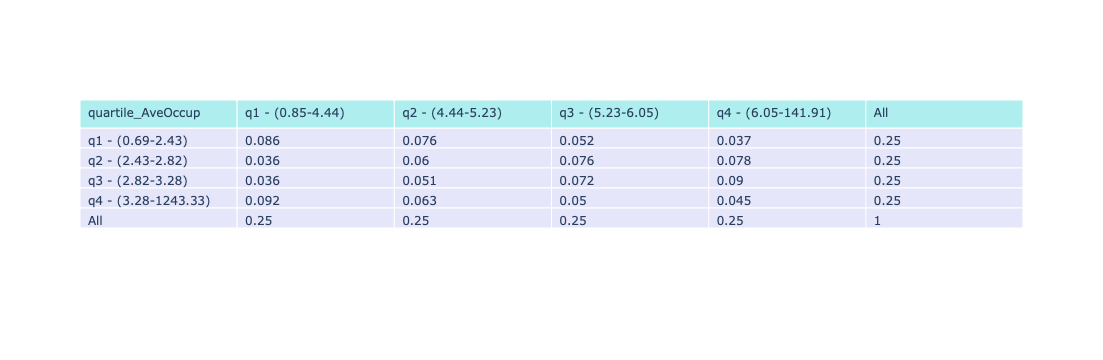

In [13]:
plot_df_table_plotly(ct_margins.reset_index())

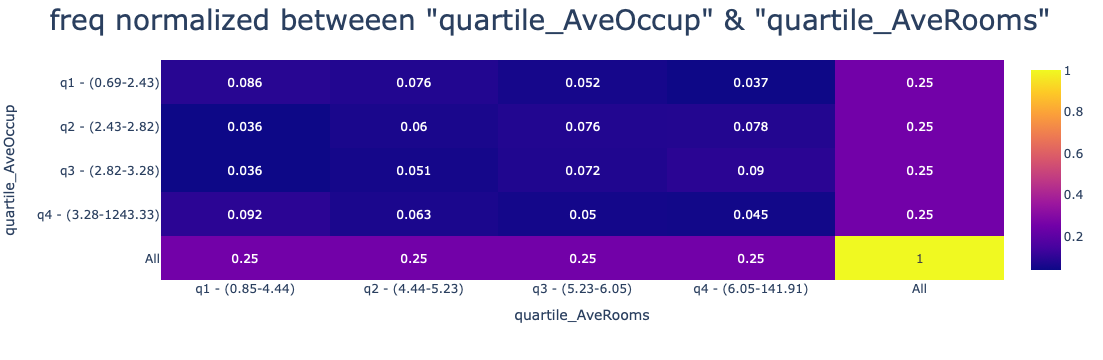

In [14]:
# plot heatmap
fig_ct_individual = plot_heatmap_hist2d_individual_features(ct_margins, 
                                                            f'freq normalized betweeen "{feature_x}" & "{feature_y}"'
                                                           )
fig_ct_individual

<Axes: xlabel='quartile_AveOccup'>

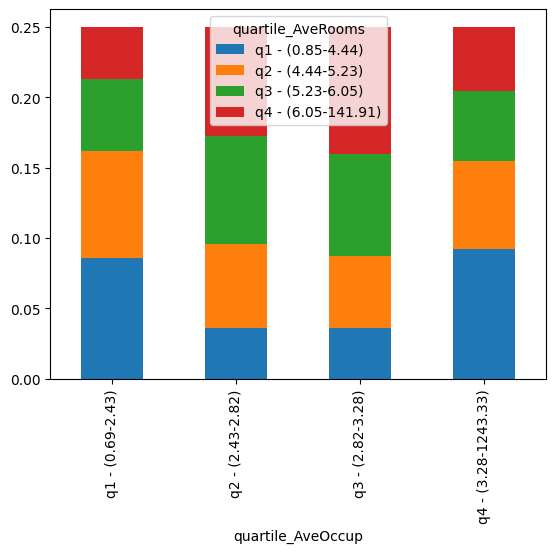

In [15]:
## plot barplot stack
ct.plot(kind='bar', stacked=True)

<Axes: xlabel='quartile_AveOccup'>

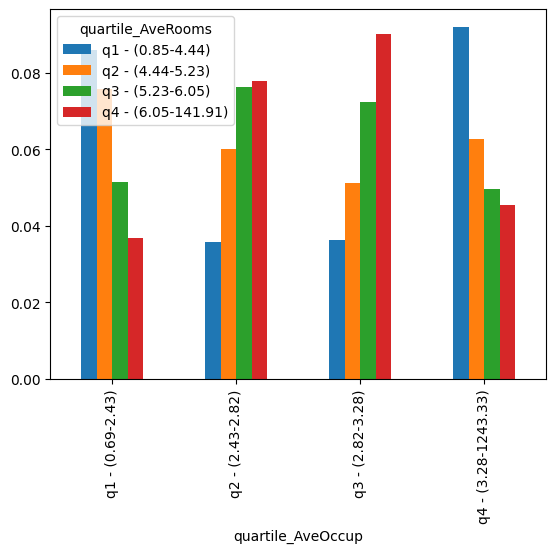

In [16]:
## plot barplot stack
ct.plot(kind='bar', stacked=False)

### 2. synthetize - given a dataframe generate a heatmap/histogram 2d of each feature

### INDIVIDUAL PLOT - PLOT FOR A ONLY PAIR OF FEATURES

In [17]:
def generate_crosstab_freq_between_2_features(df, feature_x, feature_y, ct_normalized = True):
    """
    Given a dataframe and 2 features x-axis and y-axis generate a cross table of frecuency between the intersection of this pair of categorical
    features

    Args:
        df (dataframe): input dataframe
        feature_x (string): feature to show in x-axis. this feature needs to be in the input dataframe
        feature_y (string): feature to show in y-axis. this feature needs to be in the input dataframe
        ct_normalized (bool): boolean that indicate if the freq of each feature are normalized or not
    """
    ### generte cross table ofr frecuency normalizaed between each feature and margins
    ct_margins = pd.crosstab(df[feature_x], df[feature_y], normalize = ct_normalized, margins = True)
    
    # round 3 decimals
    ct_margins = ct_margins.round(3)

    return ct_margins

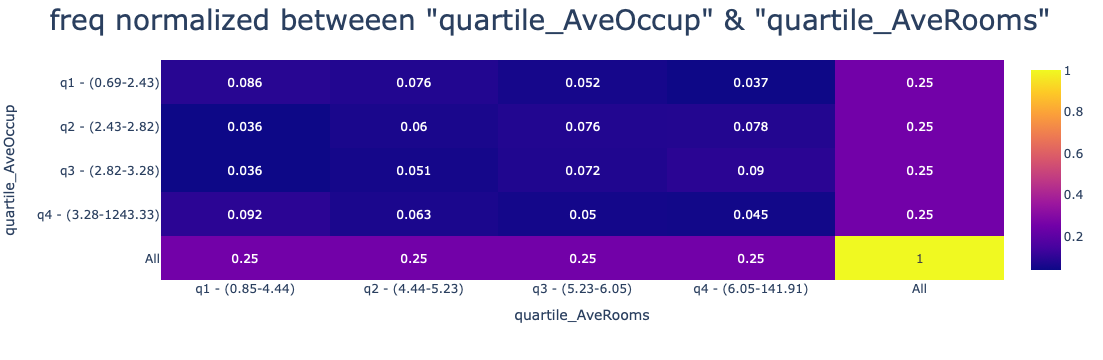

In [18]:
# calculate ct
ct_margins = generate_crosstab_freq_between_2_features(df = data, 
                                                       feature_x = feature_x, 
                                                       feature_y = feature_y, 
                                                       ct_normalized = True)

# plot heatmap
fig_ct_individual = plot_heatmap_hist2d_individual_features(ct_margins, 
                                                            f'freq normalized betweeen "{feature_x}" & "{feature_y}"')
fig_ct_individual

### GRUPAL PLOT - PLOT FOR EACH PAIR OF FEATUES

In [19]:
def heatmap_hist2d_features_percentile(df, target, ct_normalized = True, number_columns = 1):
    """
    Given a dataframe with columns features + target. Genereate a heatmap/histogram 2d between each pair of features categorical (ej percentile)
    Detail: given a dataframe with features categorical, generate a crosstab of freq between 2 features and plot it in a heatmap
    
    Args
        df (dataframe): input dataframe with columns features and target
        target (string): target of the dataframe, column that will be delete to plot the relations between only features
        ct_normalized (bool): boolean that indicate if the freq of each feature are normalized or not
        number_columns (integer): number of columns. because heatmap could be bigger, plot it into 1 columns by default

    Return
        fig (figure plotly): fig of plotly with the plot generated
    """

    ################# generate a list of tuples of each pair of features to generate the cross table  #####################
    df_only_features = df.drop(columns = target) # delete target of the data
    list_pair_features = list_map_combinations_features(df_only_features) # generate list of pair features

    
    ####################### plot #################################
    
    # calculate number of rows (considering the number of colums passed as args)
    if (len(list_pair_features) % number_columns) != 0:
        number_rows = (len(list_pair_features) // number_columns) + 1
    else:
        number_rows = (len(list_pair_features) // number_columns)

    # create fig to plot
    fig = make_subplots(rows=number_rows, cols=number_columns, 
                        subplot_titles = tuple([str(tupla) for tupla in list_pair_features]) ### title of each subplots
                       )

    ########## for each tuple of features to plot:
    for index_feature, (feature_x, feature_y) in enumerate(list_pair_features):

        # get indexes in the subplot (in plotly the indexes starts in 1)
        row = (index_feature // number_columns) + 1
        column = (index_feature % number_columns) + 1

        ## get cross table freq between feature_x and feature_y. with margins. It is possible to select between normalized values or not
        if ct_normalized:
            ct_freq_features = pd.crosstab(df[feature_x], df[feature_y], normalize=True, margins = True)
        else:
            ct_freq_features = pd.crosstab(df[feature_x], df[feature_y], normalize=False, margins = True)
            ct_freq_features = ct_freq_features.round(3)
        
        ## tranform cross table freq between pair of features into a heatmap
        fig_aux = px.imshow(ct_freq_features, text_auto=True, aspect="auto")
        
        
        # add heatmap to fig global
        fig.add_trace(fig_aux.data[0],
            row = row,
            col = column
        )

    # adjust the shape
    fig.update_layout(
        height = 350 * number_rows,  # largo
        width = 850 * number_columns,  # ancho
        title_text =  f'[freq/cross table/hist 2d] betweeen pair of features',
        title_x=0.5,
        title_font = dict(size = 20)
    )

    return fig

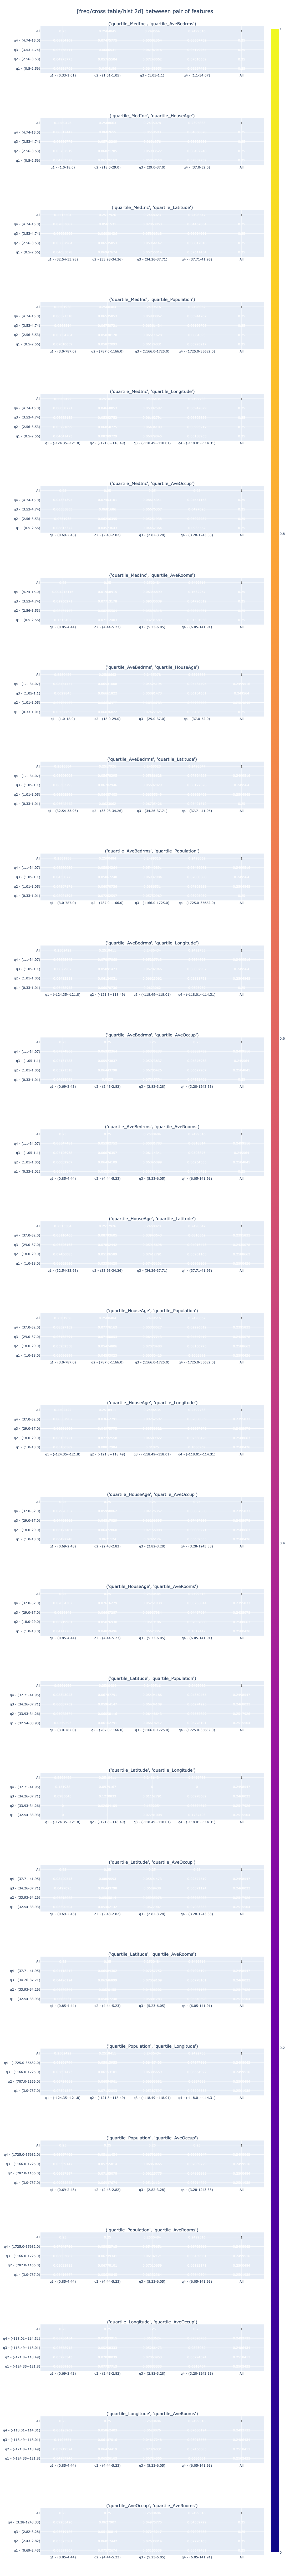

In [20]:
fig_freq_heatmap_all_features_percentile = heatmap_hist2d_features_percentile(df = data, 
                                                                              target = target, 
                                                                              ct_normalized = True)

fig_freq_heatmap_all_features_percentile.write_html("output_eda/5_categorical_analysis/freq_heatmap_all_features_percentile.html")

fig_freq_heatmap_all_features_percentile.show()